In [1]:
from  yoav_experiment_embedding_mnist import *

In [2]:
rhoG=1.e-3
digit=4
MN=mnist(datasize=0,digittype=digit)
num_landmarks=20

In [3]:
allV={}
for digit in range(10):
    V,lm_indices,source_indices,labels = MN.calc_voltages(num_landmarks=num_landmarks,digit_type=digit,rhoG=rhoG,rs=8)
    allV[digit]=(V,lm_indices,source_indices,labels)

Propagate voltage: 100%|████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 172.13it/s]


Propagate voltage: 100%|████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 291.31it/s]


Propagate voltage: 100%|████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 286.39it/s]


In [48]:
!mkdir Results_yoav

In [5]:
!ls -lrth  Results_yoav/

total 16416
-rw-r--r--  1 yoavfreund  staff   201K Sep 24 18:12 100Landmarks5000Points.pkl
-rw-r--r--  1 yoavfreund  staff   7.8M Sep 24 20:11 20Landmarks5000Points.pkl


In [4]:
import pickle as pk
with open('Results_yoav/20Landmarks5000Points.pkl','wb') as pkl_file:
    pk.dump(allV,pkl_file)

In [6]:
def calc_ER(V1,s1,V2,s2):
    selfV1=np.mean(V1[s1])
    selfV2=np.mean(V2[s2])
    cross12=np.mean(V1[s2])
    cross21=np.mean(V2[s1])
    dist=selfV1+selfV2-cross12-cross21
    return dist,selfV1,selfV2,cross12,cross21

In [7]:
combined_V=[]
combined_sources=[]
labels=[]
for i in range(10):
    for j in range(allV[i][0].shape[0]):
        combined_V.append(allV[i][0][j,:])
        combined_sources.append(allV[i][2][j])
        labels.append(i)

In [8]:
source_indices=combined_sources
V=np.stack(combined_V)
V.shape

(200, 5001)

### Are small distances symmtric.

I would like to know whether one can estimate the ER by considering one half of it:

Is `selfV1-cross12`  close to `selfV2-cross21`

In [9]:
dists=[[[] for i in range(10)] for j in range(10)]
D={}  #distances from each landmark.
for i1 in range(len(source_indices)):
    D1=[]
    for i2 in range(len(source_indices)):
        V1=V[i1,:]
        V2=V[i2,:]
        s1=source_indices[i1]
        s2=source_indices[i2]
        dist,selfV1,selfV2,cross12,cross21 = calc_ER(V1,s1,V2,s2)
        
        l1=labels[i1]
        l2=labels[i2]
        
        dists[l1][l2].append(dist)
        D1.append(dist)
        #print('l1=%2d, l2=%2d, i1=%3d,i2=%3d,selfV1=%5.2f, cross12=%5.2f, selfV2=%5.2f, cross21=%5.2f dist=%5.2f'%(l1,l2,i1,i2,selfV1,cross12,selfV2,cross21,dist))
    D[i1]=D1

In [42]:
for i in range(10):
    for j in range(10):
        L=dists[i][j]
        if len(L)==0:
            continue
        print(i,j,np.mean(L),np.std(L),np.min(L),np.max(L))

0 0 3.2306527563744796 2.588202247281519 0.0 12.948020816813136
0 1 2.4854679201196133 2.2702830915885284 0.02325151824010957 9.601099659265122
0 2 4.279265175094331 3.1812335530351827 0.05308961451902733 18.383286464682847
0 3 3.2017610807173775 2.5581537265171614 0.023392506569001048 14.882116199879063
0 4 2.5579222754003905 2.2730223480895977 0.02942844664790878 10.125661028265924
0 5 5.04268827636405 7.1695285083114975 0.031026322688361974 40.022104893170784
0 6 27.802184625797945 108.92466563110517 0.024327519997578873 509.46471295872675
0 7 2.609377148480379 2.27827061804392 0.03368150147123805 10.546873080009846
0 8 17.0371050231637 62.118659075280064 0.025932731829138245 294.6240767427015
0 9 11.071052935690357 31.056274627555613 0.02872370941074112 151.0114921926761
1 0 2.4854679201196133 2.2702830915885284 0.023251518240109542 9.601099659265122
1 1 0.013503533541253459 0.01229024944432665 0.0 0.04838686197760783
1 2 1.9054735322342475 2.259554838954262 0.022247283254645422 8.

In [45]:
D[0]

[0.0,
 3.237828855133845,
 5.584532975169632,
 5.397503696648569,
 5.0955794775148435,
 4.635190218104426,
 12.948020816813136,
 4.537690885252539,
 4.793196358068366,
 2.3954176481836043,
 5.673977275212502,
 4.908596147584307,
 4.4374683834248785,
 5.184283558154939,
 6.919621083281616,
 5.248128586750412,
 5.067312074803643,
 3.4139985108949205,
 5.1503242065276735,
 4.1592634035260385,
 5.1606902982981415,
 5.162531028924528,
 5.155727908933697,
 5.18156324500856,
 5.1587559686794195,
 5.162576042186837,
 5.160411596025742,
 5.153264529571526,
 5.148698654904639,
 5.16133208588389,
 5.186869103574702,
 5.198049618539461,
 5.16133208588389,
 5.160774779651903,
 5.155530957372847,
 5.160164716204446,
 5.161456442839455,
 5.162934851556431,
 5.181999378963858,
 5.156632059485093,
 5.126734543619624,
 6.261981726746498,
 11.02410624811867,
 5.366620570811969,
 5.7735900892373015,
 5.545559724309003,
 5.270713914889953,
 6.28540565663712,
 9.375933261135843,
 8.63314480136584,
 7.705425

In [56]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


#### Create a hierarchy of epsilon Covers

In [11]:
from random import choice

In [38]:
epsilon=10

cover=[choice(range(len(D)))]

while epsilon>0.8:
    while True:
        added=False
        for i in range(len(D)):
            if i in cover:
                continue
            D_to_cover=[D[i][j] for j in cover]
            min_d=min(D_to_cover)
            if min_d>epsilon:
                cover.append(i)
                #print(i,min_d,cover)
                added=True
        if not added:
            break
    print(epsilon,len(cover))
    epsilon=epsilon/2

10 7
5.0 16
2.5 30
1.25 41


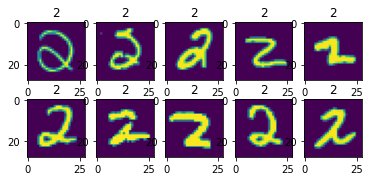

In [39]:
label=2
indices=[]
for i in sorted(cover):
    if int(i/num_landmarks)!=label:
        continue
    indices.append(allV[label][1][i%num_landmarks])
indices

MN.plot_landmark(indices)

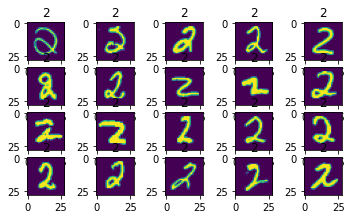

In [41]:
MN.plot_landmark(allV[label][1])

### To do

1. Take a single character (say 2) partition according to identify of three closest landmarks, and scatter in triangle according to relative distances from these three landmarks.
2. Use scaling of epsilon cover as a function of epsilon to estimate the dimension for each digit.